In [1]:
import pandas as pd #import pandas
import numpy as np #import numpy

In [2]:
data = pd.read_csv('titanic/train.csv') #comma separed values, valores separados por vírgula

In [3]:
data.columns = ['PassageiroID', 'Sobreviventes', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosParesAmorosos',
       'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [4]:
data.head()

,PassageiroID,Sobreviventes,Classe,Nome,Sexo,Idade,IrmaosParesAmorosos,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data['Sexo'].replace({'male':'homem','female':'mulher'})

0       homem
1      mulher
2      mulher
3      mulher
4       homem
        ...  
886     homem
887    mulher
888    mulher
889     homem
890     homem
Name: Sexo, Length: 891, dtype: object

In [6]:
data['Cabine'] = data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

#
matplotlib

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

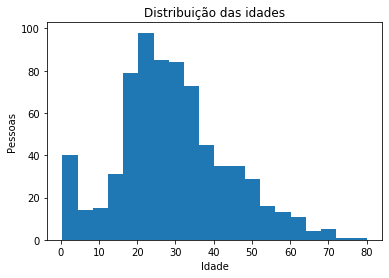

In [8]:
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição das idades')
plt.ylabel('Pessoas')
plt.xlabel('Idade')
plt.show()

In [9]:
data['Classe'].unique()

array([3, 1, 2])

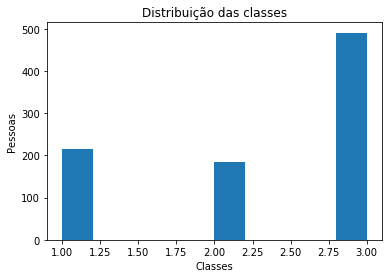

In [10]:
plt.hist(data['Classe'])
plt.title('Distribuição das classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')
plt.show()

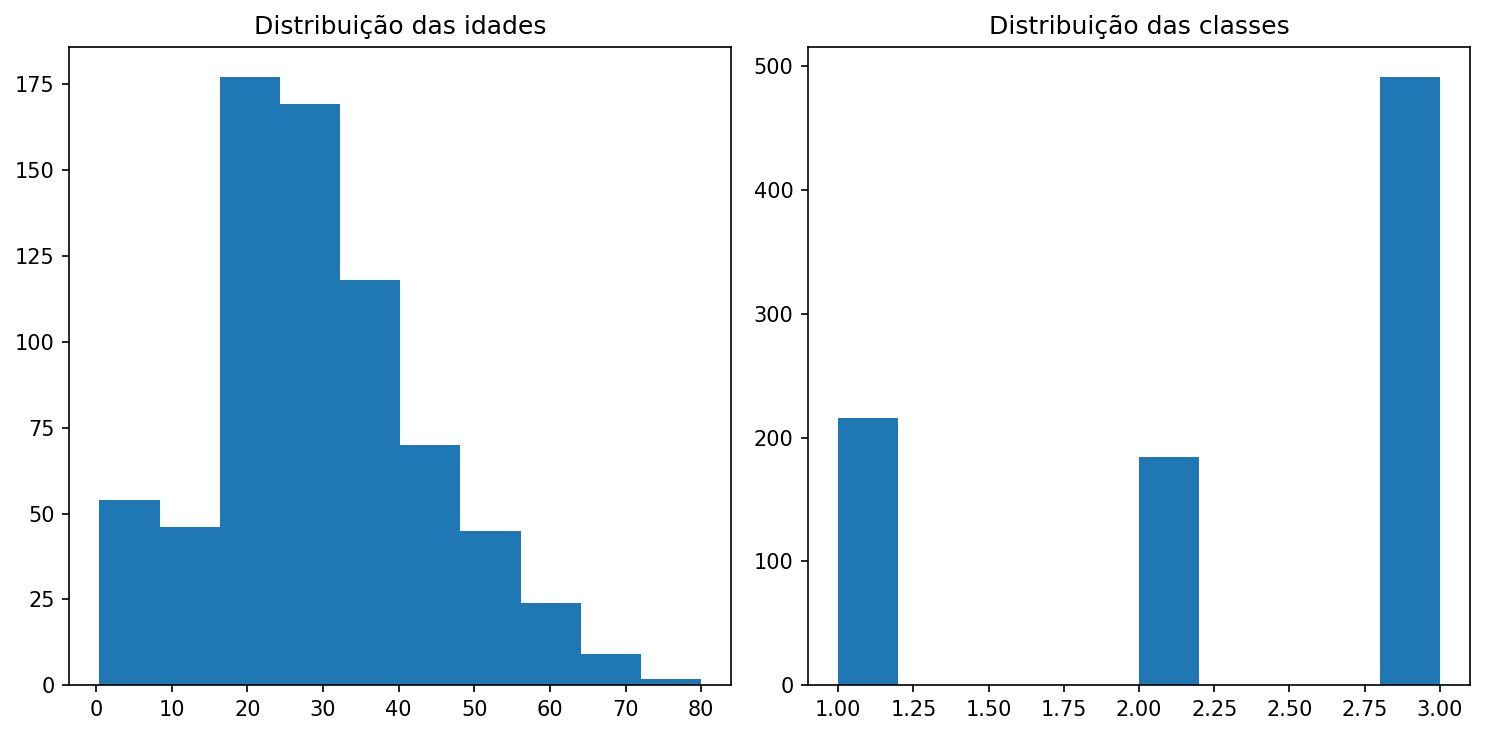

In [11]:
plt.figure(figsize=(10,5), dpi=150)
plt.subplot(1,2,1) #1 linha, 2 colunas, plot 1
plt.hist(data['Idade'].dropna())
plt.title('Distribuição das idades')

plt.subplot(1,2,2) #1 linha, 2 colunas, plot 2
plt.hist(data['Classe'].dropna())
plt.title('Distribuição das classes')

plt.tight_layout() #layout apertado, tira a distância
plt.show()

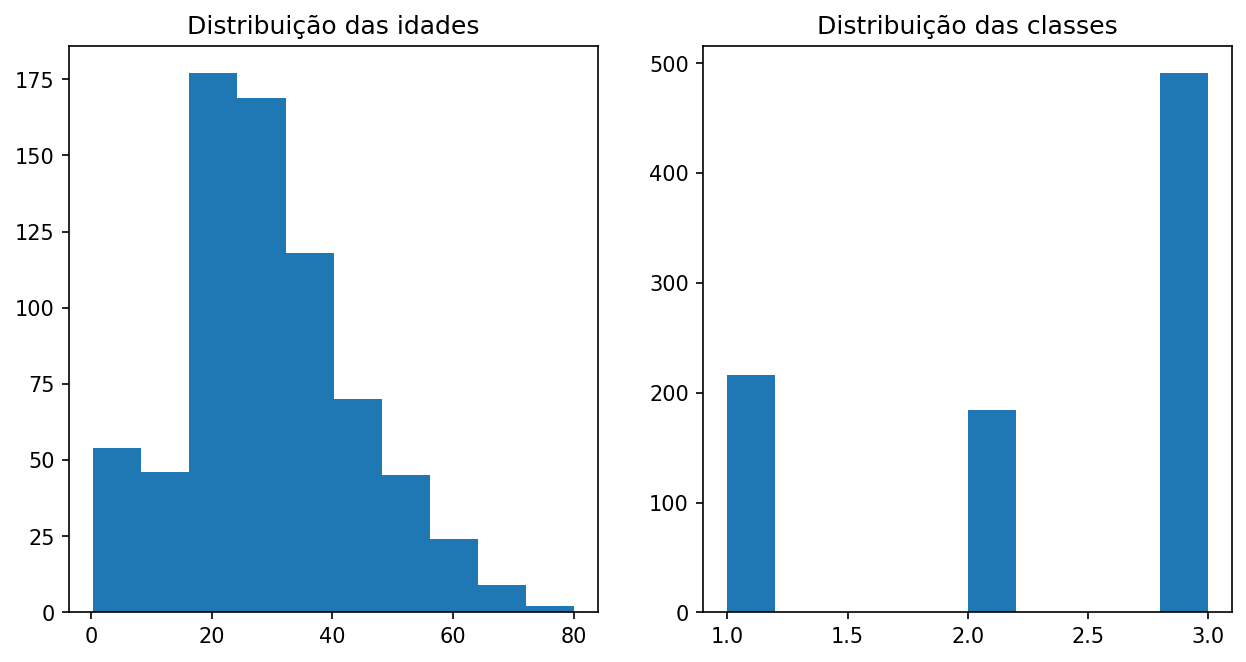

In [12]:
f, ax = plt.subplots(1,2, figsize=(10,5), dpi=150) #1 linha, 2 colunas
ax[0].hist(data['Idade'].dropna())
ax[0].set_title('Distribuição das idades')

ax[1].hist(data['Classe'])
ax[1].set_title('Distribuição das classes')
plt.show()

# seaborn

In [13]:
import seaborn as sns

In [14]:
data['Sobreviventes'].value_counts()

0    549
1    342
Name: Sobreviventes, dtype: int64

In [15]:
data['Sexo'].value_counts()

male      577
female    314
Name: Sexo, dtype: int64

In [16]:
data['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

# pie e countplot

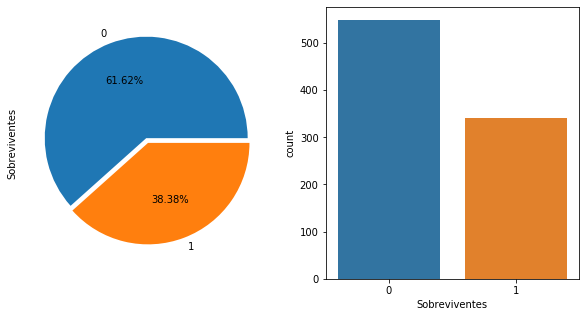

In [17]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Sobreviventes'].value_counts().plot.pie(ax=ax[0], explode=[0.05,0], autopct='%0.2f%%')

sns.countplot('Sobreviventes', data=data, ax=ax[1])

# countplot e hue

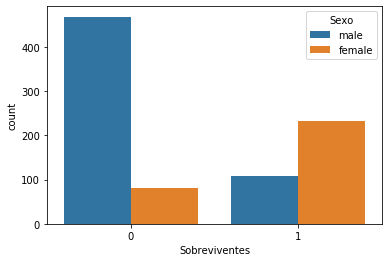

In [18]:
sns.countplot('Sobreviventes', hue='Sexo', data=data)

# boxplot

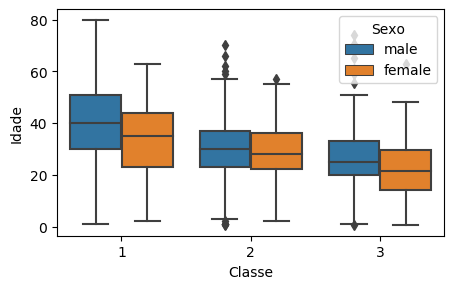

In [19]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

# violinplot

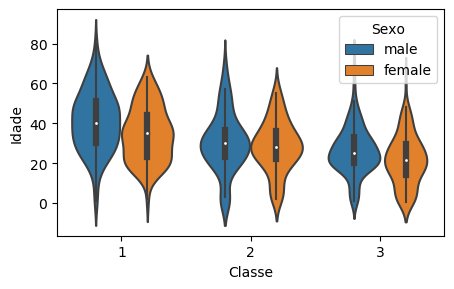

In [20]:
plt.figure(figsize=(5,3),dpi=100)
sns.violinplot(x='Classe', y='Idade', hue='Sexo', data=data)

# Facetgrid com hist

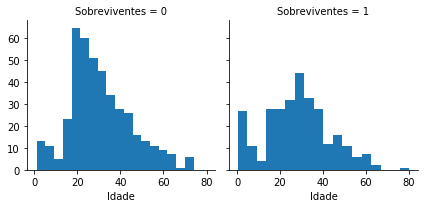

In [21]:
g = sns.FacetGrid(data, col = 'Sobreviventes')
g.map(plt.hist, 'Idade', bins=18)

# FacetGrid com batplot

/home/jeniffermb/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


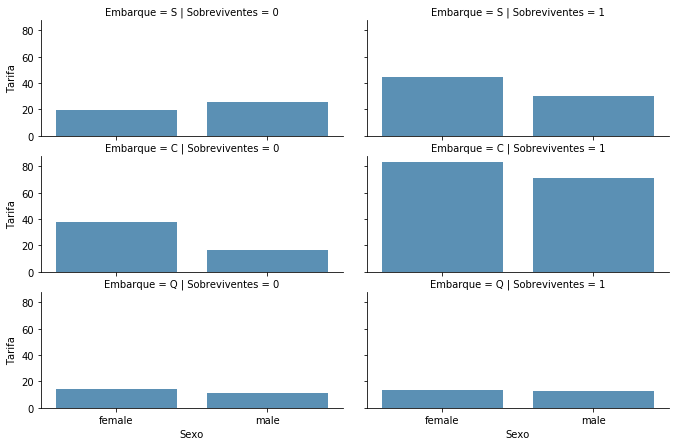

In [22]:
g = sns.FacetGrid(data, row='Embarque', col='Sobreviventes')
g.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.8, ci=None)

fig = plt.gcf()
fig.set_size_inches(10,6)

# FacetGrid com distplot

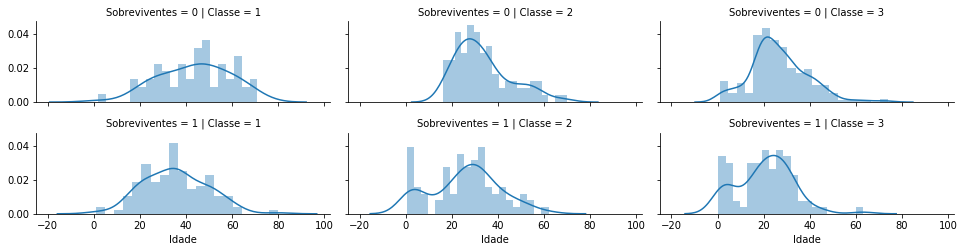

In [23]:
g = sns.FacetGrid(data, row='Sobreviventes', col='Classe', height=1.8, aspect = 2.5)
g.map(sns.distplot, 'Idade', bins=20)

# catplot do tipo "point"

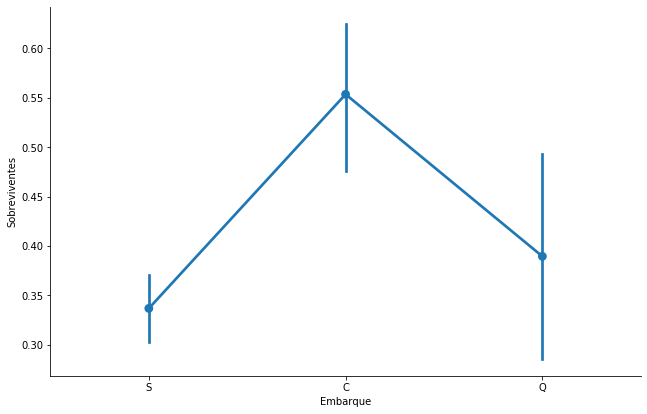

In [24]:
g = sns.catplot('Embarque', 'Sobreviventes', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(10,6)

# FacetGrid com pointplot

/home/jeniffermb/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/jeniffermb/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


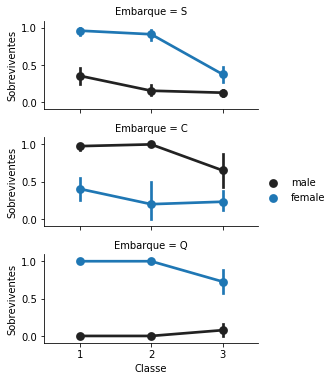

In [25]:
g = sns.FacetGrid(data, row='Embarque', height=1.8, aspect = 2.2)
g.map(sns.pointplot, 'Classe', 'Sobreviventes', 'Sexo')
g.add_legend()

# heatmap

In [26]:
data.isnull().sum()

PassageiroID             0
Sobreviventes            0
Classe                   0
Nome                     0
Sexo                     0
Idade                  177
IrmaosParesAmorosos      0
PaisFilhos               0
Bilhete                  0
Tarifa                   0
Cabine                 687
Embarque                 2
dtype: int64

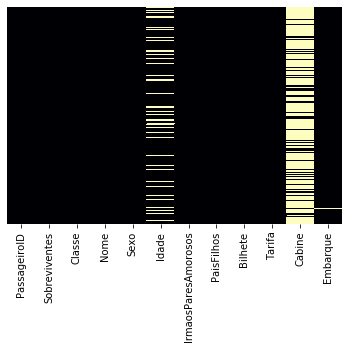

In [27]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

# relplot

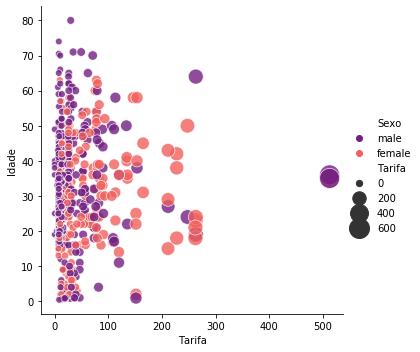

In [28]:
sns.relplot(x='Tarifa', y='Idade', hue='Sexo', data=data, size='Tarifa', sizes=(40,400), alpha=0.8, palette='magma')
plt.show()

# scatterplot

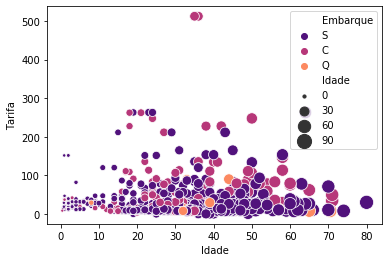

In [29]:
sns.scatterplot(x='Idade', y='Tarifa', hue='Embarque', size='Idade', palette='magma', data=data, sizes=(10,200))

# pairplot

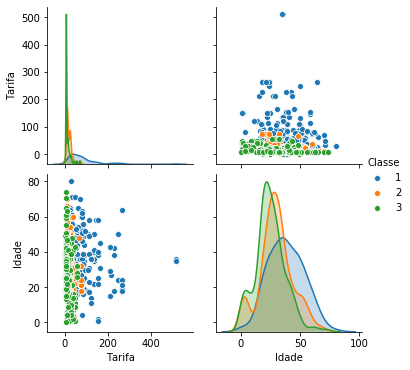

In [30]:
sns.pairplot(data[['Tarifa', 'Idade', 'Classe', 'Sexo', 'Embarque']], hue='Classe')

# Jointplot

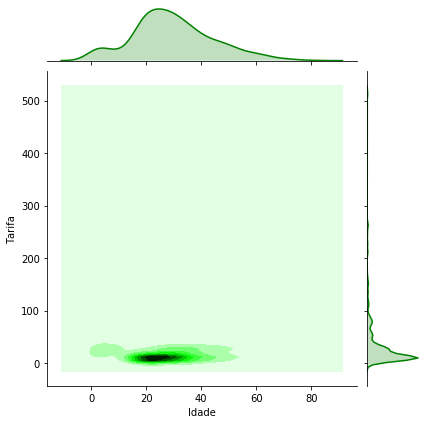

In [31]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='kde', color='g')

# JointPlot com reg

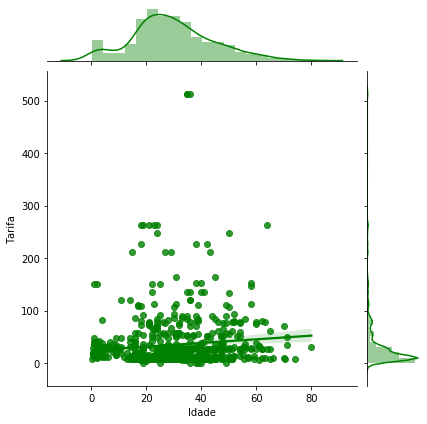

In [32]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='reg', color='g')

# kdeplot

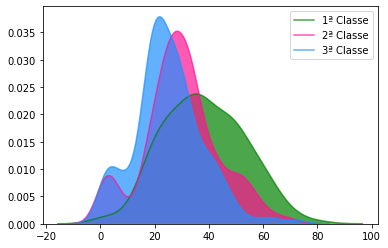

In [33]:
sns.kdeplot(data['Idade'].loc[data['Classe']==1],shade=True,
            color='g', label='1ª Classe', alpha=0.7)
sns.kdeplot(data['Idade'].loc[data['Classe']==2],shade=True,
            color='deeppink', label='2ª Classe', alpha=0.7)
sns.kdeplot(data['Idade'].loc[data['Classe']==3],shade=True,
            color='dodgerblue', label='3ª Classe', alpha=0.7)

plt.show()

# Catplot do tipo count

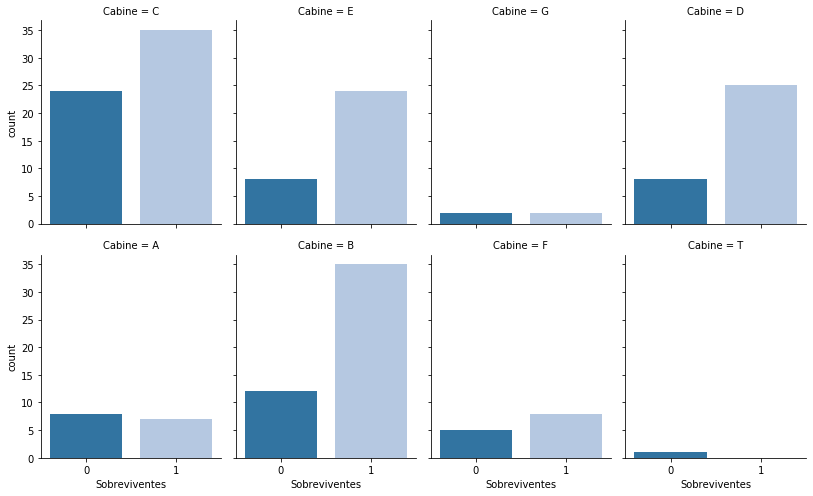

In [35]:
sns.catplot('Sobreviventes', col='Cabine', data=data[['Sobreviventes', 'Cabine']].dropna(), kind='count',
            height=3.5, aspect=0.8, col_wrap=4, palette='tab20')

plt.show()

# heatmap corr()

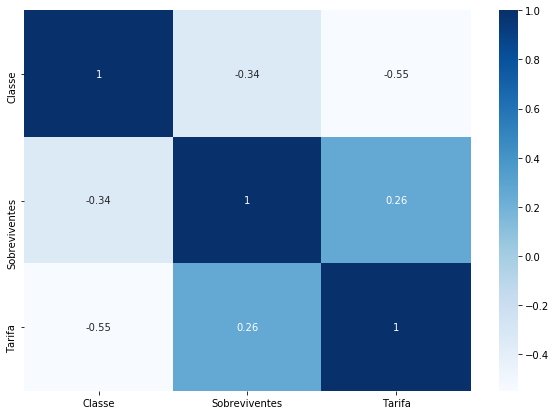

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(data[['Classe', 'Sobreviventes', 'Tarifa', 'Embarque']].corr(), cmap='Blues', annot=True)

# corr de um não inteiro

In [37]:
data[['Classe', 'Sobreviventes', 'Tarifa', 'Embarque']].corr()

,Classe,Sobreviventes,Tarifa
Classe,1.000000,-0.338481,-0.549500
Sobreviventes,-0.338481,1.000000,0.257307
Tarifa,-0.549500,0.257307,1.000000


In [40]:
data = pd.get_dummies(data=data,columns=['Embarque'], drop_first=True)

In [42]:
data[['Classe', 'Sobreviventes', 'Tarifa', 'Embarque_Q', 'Embarque_S']].corr()

,Classe,Sobreviventes,Tarifa,Embarque_Q,Embarque_S
Classe,1.000000,-0.338481,-0.549500,0.221009,0.081720
Sobreviventes,-0.338481,1.000000,0.257307,0.003650,-0.155660
Tarifa,-0.549500,0.257307,1.000000,-0.117216,-0.166603
Embarque_Q,0.221009,0.003650,-0.117216,1.000000,-0.496624
Embarque_S,0.081720,-0.155660,-0.166603,-0.496624,1.000000


# plot

In [44]:
x = np.random.normal(10,1,15) #15 elem, com média 10, desvio padrão 1

In [45]:
len(x)

15

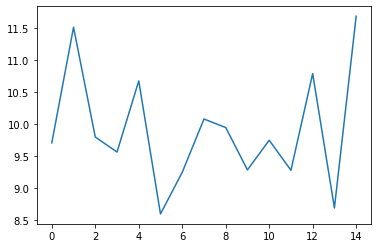

In [46]:
plt.plot(x)

# linspace

In [47]:
a = np.linspace(0, 20, 1000) #1000 num igualmente, espaçados em um intervalo de 0 a 20

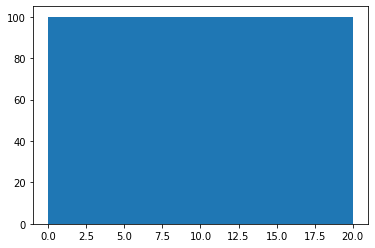

In [48]:
plt.hist(a)
plt.show()

In [53]:
y = 2*a**5 + 4*a**3 - 3*a + 5 #eq 1 grau

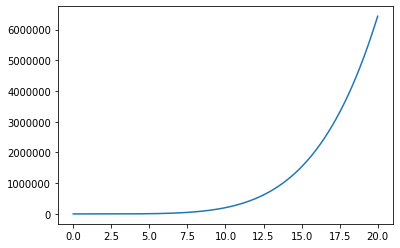

In [54]:
plt.plot(a,y)
plt.show()

In [55]:
y = np.random.normal(0,2,1000)

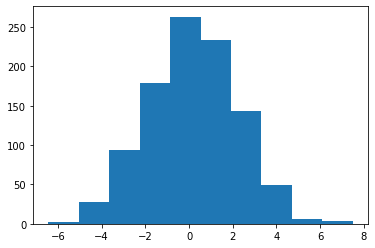

In [56]:
plt.hist(y)
plt.show()